# Manejo de datos unidimensionales: Series

<a id='indice'></a>
# Índice
1. ### [Introducción](#intro)
1. ### [Cómo crear un objeto `Series`](#crear)
1. ### [Acceso a los elementos con `[]`, `.loc[]` y `.iloc[]`](#acceso) 
    - #### [Acceso con `[]`](#acceso[])
    - #### [Acceso con `.iloc[]`](#acceso_iloc)
    - #### [Acceso con `.loc[]`](#acceso_loc)
    - #### [Acceder a múltiples ítems](#acceso_multiple)
1. ### [Selección condicional](#selec_condicional)
1. ### [Visualización](#visualizacion)
1. ### [Ejercicios](#ejercicios)
1. ### [Bibliografía](#biblio)


<a id='intro'></a>
## Introducción

**Pandas** es una librería de Python que proporciona estructuras de datos de alto nivel que permiten realizar gran cantidad de operaciones orientadas al análisis de datos.
Permite trabajar tanto con datos unidimensionales, mediante la estructura de datos `Series` como con datos multidimensionales mediante `DataFrame`. En este tutorial nos centraremos en la estructura de datos `Series`.

### La estructura de datos `Series`

Una estructura `Series` almacena datos unidimensionales de manera indexada, esto es, cada valor tiene un índice asociado. Este índice puede ser tanto un valor numérico como una etiqueta. Por defecto, si no se especifica nada, los valores se asocian con índices numéricos empezando por cero, tal y como ocurre con las listas.

### Importar pandas
Para poder trabajar con la estructura de datos `Series`, lo primero que debemos hacer es importar la librería **pandas**:

In [1]:
import pandas as pd

[Volver al índice](#indice)

<a id='crear'></a>
## Crear un objeto `Series`:

Es posible crear una estructura `Series` a partir de una lista, de un diccionario o de funciones `NumPy`, entre otros.

#### A partir de una lista

In [2]:
# Crear una Series a partir de una lista (con índices por defecto)
s = pd.Series([2,4,8,16,32])
s  # Al mostrar la serie veremos en la primera columna los índices y en la segunda los valores

0     2
1     4
2     8
3    16
4    32
dtype: int64

#### A partir de un diccionario

In [3]:
# Crear una Series a partir de un diccionario
notas = pd.Series({'Juan':7.5, 'María':9.2, 'Luis':5.7, 'Ana':6.5})
notas  # Al mostrar la serie veremos en la primera columna los índices y en la segunda los valores

Ana      6.5
Juan     7.5
Luis     5.7
María    9.2
dtype: float64

Como vemos, al crear una serie a partir de un diccionario, se utilizan las claves como índice de los valores

**Atención:** Como ya sabrás, los diccionarios no guardan los pares clave,valor en un orden concreto, por lo que el orden en el que aparecen en la serie no tiene por qué coincidir con el orden en que se añadieron en el diccionario.

#### A partir de vectores/arrays de la biblioteca NumPy

También es posible crear una serie Pandas a partir de un objeto de tipo `numpy.ndarray` que es el tipo de los vectores o arrays de la biblioteca NumPy:

In [4]:
# Crear una Series a partir de una función NumPy
import numpy as np
print(type(np.random.rand(5))) # muestra <class 'numpy.ndarray'>
random = pd.Series(np.random.rand(5))
random

<class 'numpy.ndarray'>


0    0.064593
1    0.921136
2    0.711133
3    0.462841
4    0.770744
dtype: float64

#### Especificar los índices a utilizar

Como se ha dicho anteriormente, si no se especifica lo contrario, a cada valor de la serie se le asocia como índice un valor entero, empezando por 0. Pero también es posible especificar los índices a utilizar, los cuales pueden ser tanto números como etiquetas. Para ello pasamos a `pd.Series` un segundo argumento opcional:

In [5]:
# Crear una serie con índices específicos
s = pd.Series([1024, 2048, 4096, 8192], [10,11,12,13])
s

10    1024
11    2048
12    4096
13    8192
dtype: int64

In [6]:
# Crear una serie donde los índices son etiquetas
etiquetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
valores = [1408, 5832, 24, 25, 10, 11, 17, 16]
horas_dia = pd.Series(valores, etiquetas)
horas_dia

Mercurio    1408
Venus       5832
Tierra        24
Marte         25
Júpiter       10
Saturno       11
Urano         17
Neptuno       16
dtype: int64

[Volver al índice](#indice)

<a id='acceso'></a>
## Acceso a los elementos con `[]`, `.loc[]` y `.iloc[]`

Es posible acceder a los valores de una serie tanto a partir de su etiqueta como de su posición.

<a id='acceso[]'></a>
### Acceso mediante el operador `[]`

El operador `[]` permite buscar los valores tanto por **posición** como por **etiqueta**, dependiendo del valor que pongamos enre los corchetes. Esto, como se muestra en el último ejemplo, puede llegar a ser confuso.

In [7]:
s = pd.Series([2,4,8,16,32,64])
print(s[2]) # Muestra el elemento en tercera posición (recuerda que el primer elemento ocupa la posición 0)
s

8


0     2
1     4
2     8
3    16
4    32
5    64
dtype: int64

Si se ha definido explícitamente un índice, entonces es posible realizar la búsqueda a partir de las etiquetas de los índices.

In [8]:
etiquetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
valores = [1408, 5832, 24, 25, 10, 11, 17, 16]
horas_dia = pd.Series(valores, etiquetas)

# Acceso por etiqueta
print(f"Duración del día en La Tierra: {horas_dia['Tierra']} h.")

# Aunque sigue siendo posible hacer la búsqueda por posición
print(f"Duración del día en Marte: {horas_dia[3]} h.")

Duración del día en La Tierra: 24 h.
Duración del día en Marte: 25 h.


La confusión llega **cuando todas las etiquetas son numéricas**. En este caso, el número indicado entre corchetes indicará la etiqueta y no la posición.

In [9]:
s = pd.Series([1024, 2048, 4096, 8192], [3,4,5,6])
print(s[3])  # Accede al valor 1024 (etiqueta 3) y no al 8192 (posición 3)
try:
    print(s[0]) #genera una excepción de tipo KeyError ya que no existe la etiqueta 0
except KeyError:
    print("Ha dado un KeyError")

1024
Ha dado un KeyError


Pero cuando no todas las etiquetas son numéricas los índices numéricos pueden utilizarse como etiqueta y, si no existen como tal, como posición:

In [10]:
s = pd.Series([1024, 2048, 4096, 8192], [3,4,5,"hola"])
print(s[3]) # Accede al valor 1024 y no a la posición 3 (valor 8192)
print(s[0]) # Accede también al valor 1024, por posición y no por etiqueta

1024
1024


¿Es confuso o no es confuso?

<a id='acceso_iloc'></a>
### Acceso mediante `.iloc[]`

El operador `.iloc[]` busca **únicamente por posición**.

In [13]:
s = pd.Series([1024, 2048, 4096, 8192], [10,11,12,13])
print(s.iloc[0])  # Accede al valor 1024
try:
    s.iloc[10] # genera una excepción ya que no existe la posición 10
except IndexError:
    print("Ha dado un IndexError")

1024
Ha dado un IndexError


<a id='acceso_loc'></a>
### Acceso mediante `.loc[]`

El operador `.loc[]` busca **únicamente por etiqueta**.

In [14]:
s = pd.Series([1024, 2048, 4096, 8192], [10,11,12,13])
print(s.loc[10])  # Accede al valor 1024
try:
    print(s.loc[0]) # genera una excepción ya que no existe la etiqueta 0
except KeyError:
    print("Dispara un KeyError")

1024
Dispara un KeyError


<a id='acceso_multiple'></a>
### Acceder a múltiple ítems

Independientemente del método de búsqueda empleado (por posición o por etiqueta), es posible acceder a varios ítems simultáneamente mediante:

   - la especificación de una lista con las posiciones o etiquetas de los elementos a recuperar
   - el uso de *slicing*
   
En ambos casos, el resultado de la operación será una nueva estructura `Series` con los ítems seleccionados, aunque con una importante diferencia:

- En el primer caso (**lista**) la serie resultante contiene una **copia** de los ítems seleccionados, mientras que
- En el segundo (***slicing***) la serie resultante contiene **referencias** a los ítems seleccionados.

Ello implica que si usamos *slicing*, la modificación de cualquier ítem de la serie resultante afectará también a la serie original, cosa que no ocurrirá si seleccionamos mediante una lista. 

#### Recuperar ítems a partir de lista de etiquetas

In [15]:
print("horas_dia es de tipo",type(horas_dia))
selec = horas_dia.loc[['Tierra', 'Júpiter', 'Urano']]
print("selec es de tipo",type(selec))
selec

horas_dia es de tipo <class 'pandas.core.series.Series'>
selec es de tipo <class 'pandas.core.series.Series'>


Tierra     24
Júpiter    10
Urano      17
dtype: int64

#### Recuperar ítems a partir de lista de índices

In [16]:
selec = horas_dia.iloc[[0,2,5]]
selec

Mercurio    1408
Tierra        24
Saturno       11
dtype: int64

#### Recuperar ítems mediante *slicing* (con etiquetas)

In [17]:
selec = horas_dia.loc['Tierra':'Urano']
print('selec es de tipo',type(selec))
selec

selec es de tipo <class 'pandas.core.series.Series'>


Tierra     24
Marte      25
Júpiter    10
Saturno    11
Urano      17
dtype: int64

#### Recuperar ítems mediante *slicing* (con índices)

In [18]:
selec = horas_dia.iloc[1:4]
print("selec es de tipo",type(selec))
selec

selec es de tipo <class 'pandas.core.series.Series'>


Venus     5832
Tierra      24
Marte       25
dtype: int64

Nótese que todo lo anterior puede realizarse también directamente con el operador `[]` (sin usar `.loc` o `.iloc`).

#### Lista vs *slicing*

Como se ha mencionado anteriormente, la selección mediante una lista de índices o etiquetas genera una nueva **copia** de los ítems seleccionados, mientras que el uso de *slicing* genera **referencias** a los ítems selecionados.

In [19]:
selec = horas_dia.loc[['Tierra', 'Júpiter', 'Urano']]
selec['Tierra'] = 25 # Modificamos la duración del día en la tierra. Este cambio NO afecta a la serie original
print("Duración del día en La Tierra (en la nueva serie):",selec['Tierra'])
print("Duración del día en La Tierra (en la serie original):",horas_dia['Tierra'])

Duración del día en La Tierra (en la nueva serie): 25
Duración del día en La Tierra (en la serie original): 24


In [20]:
selec = horas_dia.iloc[:3]
selec['Tierra'] = 25 # Modificamos la duración del día en la tierra. Este cambio SÍ afecta a la serie original
print("Duración del día en La Tierra (en la nueva serie):",selec['Tierra'])
print("Duración del día en La Tierra (en la serie original):",horas_dia['Tierra'])

selec['Tierra'] = 24 # Lo volvemos a dejar como estaba

Duración del día en La Tierra (en la nueva serie): 25
Duración del día en La Tierra (en la serie original): 25


[Volver al índice](#indice)

<a id='selec_condicional'></a>
## Selección condicional

Además del uso de *slicing* o de listas de índices/etiquetas para seleccionar ítems de una serie, también es posible seleccionar elementos que cumplan cierta condición.

Para realizar una selección condicional se aplica en primer lugar una expresión booleana a todos los elementos de la serie, lo cual **devuelve una nueva serie del mismo tamaño con valores de tipo booleano (`True`/`False`)**, dependiendo de que los valores correspondientes en la serie original cumplan o no dicha expresión.

In [21]:
flags = horas_dia > 24
print('flags es de tipo',type(flags),"de tipo",flags.dtype)
flags

flags es de tipo <class 'pandas.core.series.Series'> de tipo bool


Mercurio     True
Venus        True
Tierra      False
Marte        True
Júpiter     False
Saturno     False
Urano       False
Neptuno     False
dtype: bool

A continuación, con la serie `flags` podemos seleccionar aquellos planetas cuyos días duran más de 24 horas:

In [22]:
planetas_con_dias_largos = horas_dia[flags]
planetas_con_dias_largos

Mercurio    1408
Venus       5832
Marte         25
dtype: int64

También es posible hacerlo en un único paso:

In [23]:
planetas_con_dias_cortos = horas_dia[horas_dia<24]
planetas_con_dias_cortos

Júpiter    10
Saturno    11
Urano      17
Neptuno    16
dtype: int64

Si se requiere definir una condición más compleja que combine varias operaciones lógicas, **no es posible usar la sintaxis habitual con los operadores `and` y `or`**. Si ejecutas la siguiente celda:

In [24]:
horas_dia >= 15 and horas_dia <= 30 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Dará el siguiente error:

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-47-2da9a30dcb2b> in <module>
----> 1 horas_dia >= 15 and horas_dia <= 30

/usr/lib/python3/dist-packages/pandas/core/generic.py in __nonzero__(self)
   1119         raise ValueError("The truth value of a {0} is ambiguous. "
   1120                          "Use a.empty, a.bool(), a.item(), a.any() or a.all()."
-> 1121                          .format(self.__class__.__name__))
   1122 
   1123     __bool__ = __nonzero__

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
```

En este caso, la expresión booleana debe usar los operadores `&` y `|` en lugar de `and` y `or` respecivamente, y cada una de las operaciones debe ir encerrada entre paréntesis.

In [11]:
planetas_con_duracion_dia_intermedia = horas_dia[(horas_dia >= 15) & (horas_dia <= 30)]
planetas_con_duracion_dia_intermedia

Tierra     24
Marte      25
Urano      17
Neptuno    16
dtype: int64

[Volver al índice](#indice)

<a id='visualizacion'></a>
## Visualización

Para visualizar gráficamente los datos almacenados en una serie tenemos dos opciones:
1. Usando métodos propios del objeto `Series`
1. Usando funciones de la librería `matplotlib`

*Nota: internamente (1) acaba haciendo uso de (2)*

Tanto en un caso como en otro, si el programa se va a ejecutar en un jupyter notebook, para una mejor visualización conviene antes que nada ejecutar la instrucción:

`%matplotlib notebook`

Ello permitirá cierta interacción con las gráficas que creemos posteriormente (redimensionar, zoom, guardar en un archivo, ...)

Como alternativa a lo anterior, también tenemos la opción de

`%matplotlib inline`

pero en este caso perdemos la posibilidad de interactuar con la gráfica.

#### 1. Visualización usando métodos propios del objeto `Series`

`Series` dispone del método `plot` para visualizar gráficamente los datos de la serie

<IPython.core.display.Javascript object>


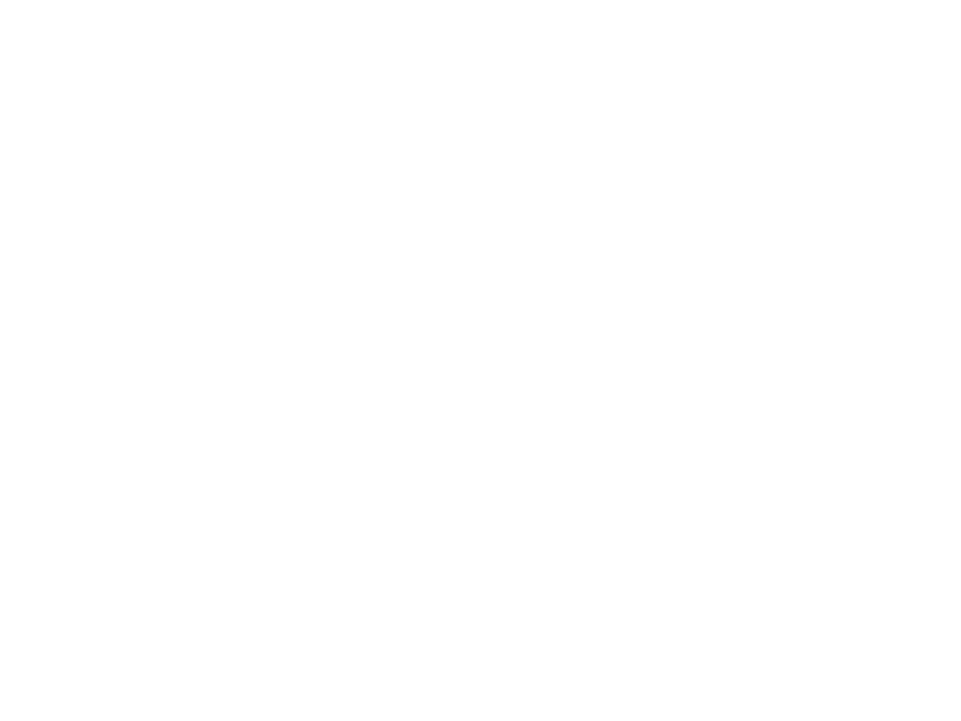

In [12]:
%matplotlib notebook
horas_dia.plot(); # Si terminamos la instrucción con ';' obtenemos una salida más limpia. Prueba hacerlo con y sin ';'

El método `plot` por defecto crea una gráfica de líneas, lo cual no será siempre lo más adecuado, como ocurre en este ejemplo. Es posible también crear gráficos de barras (`plot.bar()`), de barras horizontales (`plot.barh()`), de área (`plot.area()`), de tarta (`plot.pie()`), histogramas (`plot.hist()`), entre otros. Puedes encontrar información más detallada de estos métodos en el [API de la clase Series](https://pandas-docs.github.io/pandas-docs-travis/reference/series.html#plotting)

Nota: si hemos activado `%matplotlib notebook`, antes de visualizar una segunda gráfica deberemos parar la interacción con cualquier otra gráfica que hubiéramos ploteado anteriormente (botón de apagado en la parte superior derecha), de lo contrario el comportamiento es errático. Otra alternativa que evita tener que finalizar la interacción con gráficas anteriores es ejecutar la función `figure()` definida en el módulo `matplotlib.pyplot` antes de plotear una segunda gráfica. Para ello primero importaremos el módulo y a continuación invocaremos la función, tal y como se muestra en el siguiente ejemplo.

In [13]:
plt.figure()
horas_dia.plot.bar();

# Prueba interactuar con la gráfica dibujada, por ejemplo hacer zoom
# de los valores correspondientes a los planetas con días más cortos.

NameError: name 'plt' is not defined

#### 2. Visualización usando funciones de la librería `matplotlib`

En este caso lo primero que debemos hacer, si no lo hemos hecho ya, es importar `matplotlib.pyplot` (además de ejecutar `%matplotlib notebook` tal y como se ha explicado antes)

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

Para hacer un gráfico de líneas basta con invocar a la función `plt.plot(valores_x, valores_y)` (donde `valores_x` puede omitirse, en cuyo caso se utiliza por defecto la secuencia 0, 1, 2, ...). Normalmente pondremos en el eje y los valores de la serie (`mi_serie.values`) y en el x los índices (`mi_serie.index`).

Esta función `plot` admite muchos otros parámatros que permiten configurar y personalizar la gráfica, tal y como se explica en el [API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) de la misma.

Además del gráfico de líneas, también es posible crear de otro tipo: barras (`plt.bar`), barras horizontales (`plt.barh`), tarta (`plt.pie`), histogramas (`plt.hist`), etc.

<IPython.core.display.Javascript object>


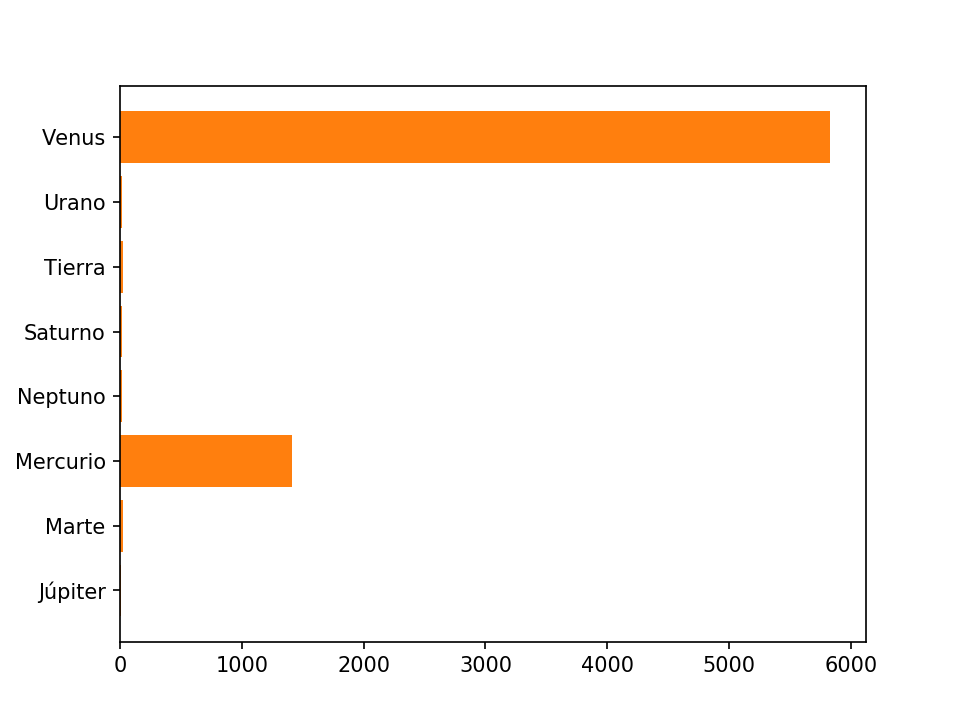

In [15]:
plt.figure()  # Para no tener que cerrar la interacción con gráficas anteriores
plt.barh(horas_dia.index, horas_dia.values);

Puedes encontrar información más detallada de estas funciones en el [API de matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) y en este [tutorial de introducción a matplotlib](introduccion_matplotlib.ipynb).

In [16]:
plt.barh(horas_dia.index, horas_dia.values);

[Volver al índice](#indice)

<a id='ejercicios'></a>
## Ejercicios

- Crea una serie que contenga como etiquetas los meses del año y como valores el número de días que tiene cada mes (considera un año no bisiesto)

- Muestra los 6 primeros meses y sus respectivos días

- Muestra los 6 últimos meses (y sus respectivos días) en orden inverso

- Muestra los meses de Marzo a Septiembre

- Pide al usuario que introduzca un número de mes [1-12] y muestra cuántos días tiene

- Pide al usuario que introduzca el nombre de un mes y muestre cuántos días tiene

- Muestra los meses con menos de 31 días

- Muestra un histograma con la frecuencia de meses según el número de días

[Volver al índice](#indice)

<a id='biblio'></a>
## Bibliografía

- **Learning pandas - Second Edition.** Heydt, Michael | Packt Publishing, Limited | 2017 [Acceso en línea](https://polibuscador.upv.es/permalink/f/1h4f73s/TN_pq_ebook_centralEBC4898666)
- **Python for data analysis:  Data Wrangling with Pandas, NumPy, and IPython.** Mckinney, Wes | O'Reilly Media, Incorporated | 2017 [Acceso en línea](https://polibuscador.upv.es/permalink/f/aaa6qf/alma5160520520003706)
- **Python for Data Science For Dummies.** Massaron, Luca and Mueller, John | For Dummies, 2015 [Acceso en línea](https://polibuscador.upv.es/permalink/f/1h4f73s/TN_pq_ebook_centralEBC1895113)